In [1]:
import torch
from transformers import VisionEncoderDecoderModel, AutoTokenizer, ViTFeatureExtractor
from PIL import Image
from torchvision import transforms

In [2]:
# Configuration
MODEL_DIR = "VIT_large_gpt2"
IMAGE_PATH = "samples/test1.png"

In [3]:
# Load the model and tokenizer
feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224")
model = VisionEncoderDecoderModel.from_pretrained(MODEL_DIR)
model = model.to("cuda")

c:\Users\ayush\Desktop\desc ai - Copy\descai\lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [4]:
# Get the encoder and decoder separately
encoder = model.encoder
decoder = model.decoder

# Count the number of parameters in the encoder
encoder_params = sum(p.numel() for p in encoder.parameters())
print(f"Number of parameters in the encoder (ViT): {encoder_params:,}")

# Count the number of parameters in the decoder
decoder_params = sum(p.numel() for p in decoder.parameters())
print(f"Number of parameters in the decoder (GPT-2): {decoder_params:,}")

# Optionally, total parameters for the whole model
total_params = encoder_params + decoder_params
print(f"Total number of parameters in the model: {total_params:,}")

Number of parameters in the encoder (ViT): 86,389,248
Number of parameters in the decoder (GPT-2): 152,806,656
Total number of parameters in the model: 239,195,904


In [5]:
from transformers import GPT2LMHeadModel

# Load the GPT-2 model separately
gpt2_model = GPT2LMHeadModel.from_pretrained("gpt2")

# Count the number of parameters in GPT-2
gpt2_params = sum(p.numel() for p in gpt2_model.parameters())
print(f"Number of parameters in GPT-2: {gpt2_params:,}")

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Number of parameters in GPT-2: 124,439,808


c:\Users\ayush\Desktop\desc ai - Copy\descai\lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ayush\.cache\huggingface\hub\models--gpt2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [4]:
def build_inputs_with_special_tokens(self, token_ids_0, token_ids_1=None):
    outputs = [self.bos_token_id] + token_ids_0 + [self.eos_token_id]
    return outputs
AutoTokenizer.build_inputs_with_special_tokens = build_inputs_with_special_tokens
tokenizer = AutoTokenizer.from_pretrained("gpt2")

c:\Users\ayush\Desktop\desc ai - Copy\descai\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [5]:
# Load and preprocess the image
img = Image.open(IMAGE_PATH).convert("RGB")
generated_caption = tokenizer.decode(
    model.generate(feature_extractor(img, return_tensors="pt").pixel_values.to("cuda"))[
        0
    ]
)
print(generated_caption[: generated_caption.find(".") + 1].replace("<|endoftext|>", ""))

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


A little girl in a pink dress is standing in front of a wooden house.


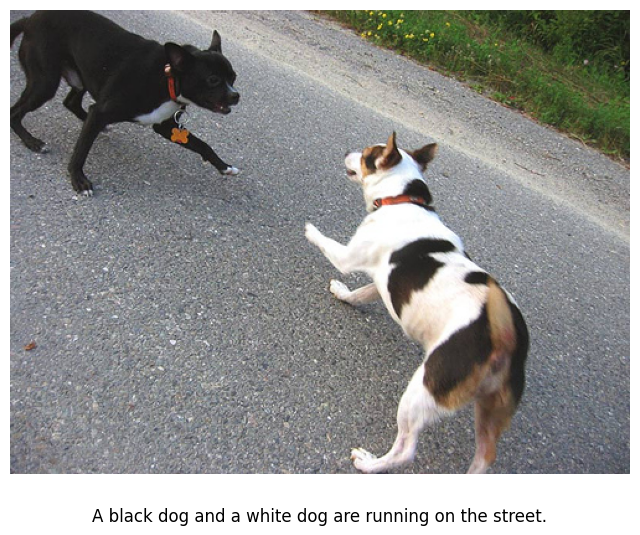

In [11]:
import matplotlib.pyplot as plt
from PIL import Image

# Load and preprocess the image
img = Image.open(IMAGE_PATH).convert("RGB")

# Generate the caption
generated_caption = tokenizer.decode(
    model.generate(feature_extractor(img, return_tensors="pt").pixel_values.to("cuda"))[
        0
    ]
)

# Clean the generated caption
caption = generated_caption[: generated_caption.find(".") + 1].replace(
    "<|endoftext|>", ""
)

# Display the image
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis("off")

# Add the caption below the image
plt.text(0.5, -0.1, caption, fontsize=12, ha="center", transform=plt.gca().transAxes)

# Show the final plot
plt.show()